In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read the input file 'diabetes.csv' using Pandas and check it's column names(1 Marks)

In [2]:
df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# Eye ball the imported dataset
df.info()

# Take away : No missing values. All dimesions are numerics. So, no conversion required.
# However, there are 0 values for Glucose, BllodPressure, SkinThickness, Insulin, BMI , Which cannot be correct. So, needs to 
# be treated.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check dimension of dataset

In [4]:
df.shape # print dimension

(768, 9)

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

In [5]:
df.Outcome.value_counts() # there are more data points for non-diabetics compared to diabetics.Model which will be trained 
# using this data ideally should be good in predicting non-diabetics

0    500
1    268
Name: Outcome, dtype: int64

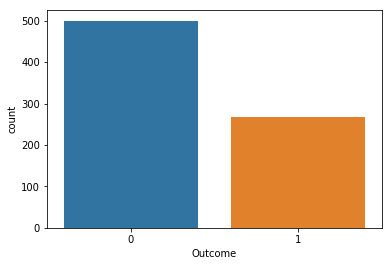

In [6]:
sns.countplot(x='Outcome', data=df);

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [7]:
# Check data types of dataset

df.dtypes # all data types are numeric. So, encoding is needed.

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Check data distribution using summary statistics and provide your findings(2 Marks)

In [8]:
df.describe()

#There are incorrect values i.e.0's in Glucose, BloodPressure, SkinThickness, Insulin, BMI. 
# replacing 0 with median of corresponding column.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataframe_temp = df.drop(["Pregnancies","Outcome"],axis = 1)
dataframe_temp
medians = dataframe_temp.median()
print("medians",medians)
dataframe_nonzero = dataframe_temp.replace(0,medians)
dataframe_nonzero["Pregnancies"] = df["Pregnancies"]
dataframe_nonzero["Outcome"] = df["Outcome"]
dataframe_nonzero

medians Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148,72,35,30.5,33.6,0.627,50,6,1
1,85,66,29,30.5,26.6,0.351,31,1,0
2,183,64,23,30.5,23.3,0.672,32,8,1
3,89,66,23,94.0,28.1,0.167,21,1,0
4,137,40,35,168.0,43.1,2.288,33,0,1
5,116,74,23,30.5,25.6,0.201,30,5,0
6,78,50,32,88.0,31.0,0.248,26,3,1
7,115,72,23,30.5,35.3,0.134,29,10,0
8,197,70,45,543.0,30.5,0.158,53,2,1
9,125,96,23,30.5,32.0,0.232,54,8,1


### Do correlation analysis and bivariate viualization with Insights(1 Marks)

In [10]:
corr = dataframe_nonzero.corr()
corr

# Takeaway : outcome is positively corelated to Glucose feature.
# Age & # of pregencies have positive corelation.
# BMI & Skin thickness has positive corelation
# No other strong negetive corelation is observed.

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.128213,0.492782
BloodPressure,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.208615,0.165723
SkinThickness,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.032568,0.189065
Insulin,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,-0.055697,0.148457
BMI,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.021546,0.312249
DiabetesPedigreeFunction,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,-0.033523,0.173844
Age,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,1.000000,0.221898
Outcome,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,0.221898,1.000000


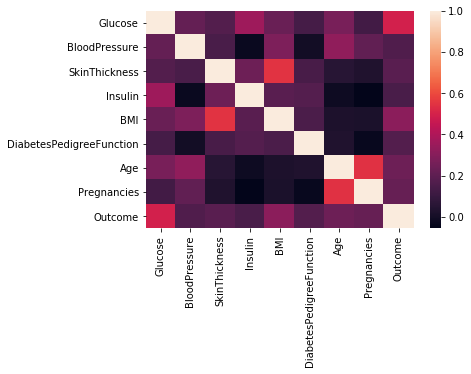

In [11]:
sns.heatmap(corr)

C:\Users\Aadee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aadee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


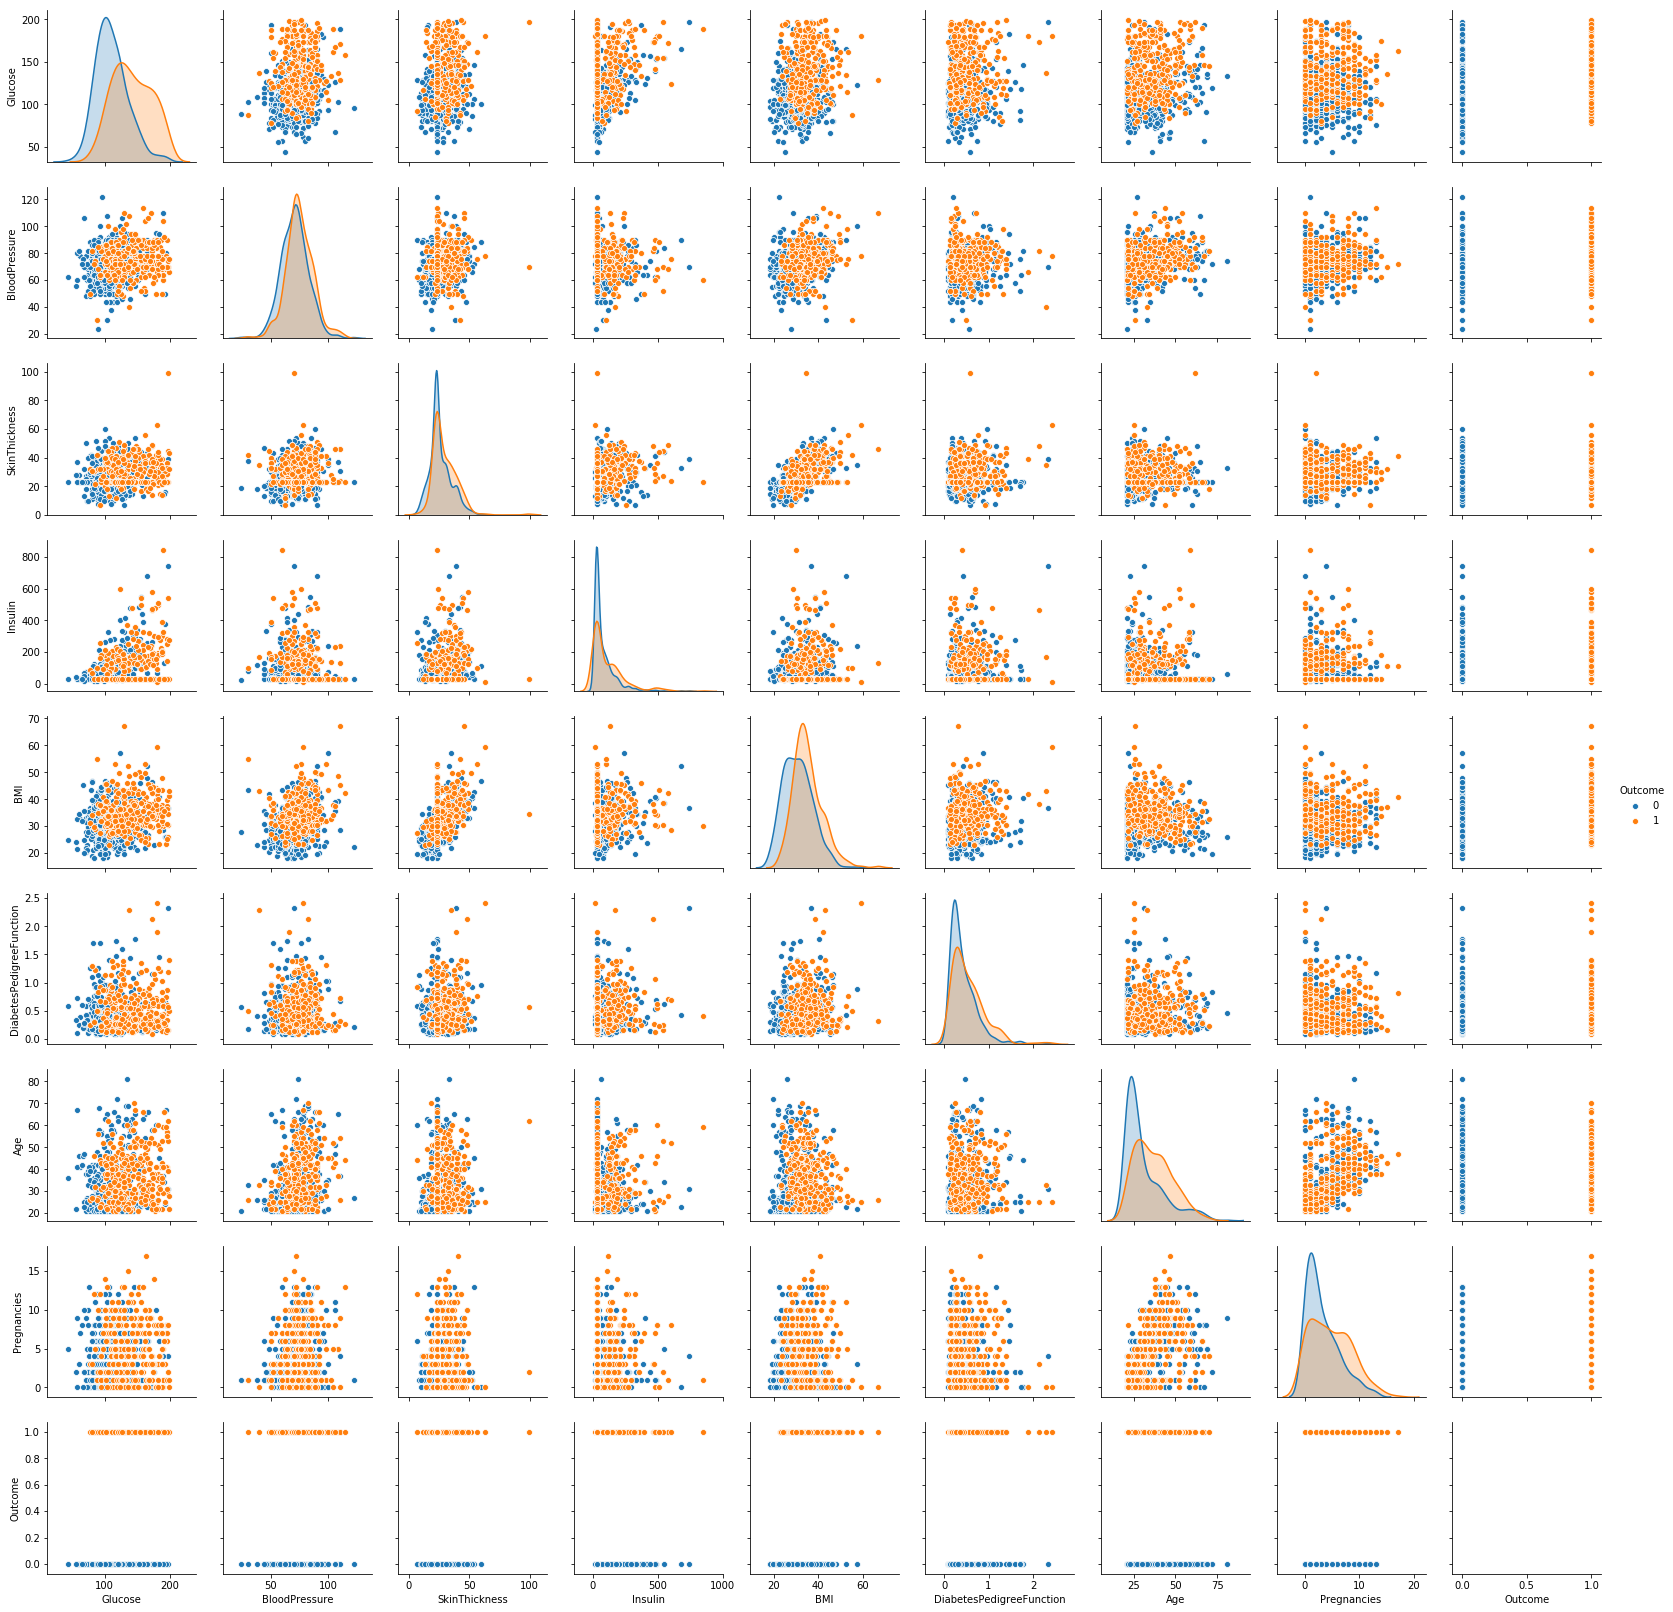

In [12]:
sns.pairplot(dataframe_nonzero, diag_kind='kde', hue="Outcome") # plotting pairplot

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [88]:
from sklearn.model_selection import train_test_split
X = dataframe_nonzero.drop('Outcome', axis=1)
Y = dataframe_nonzero['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

### Train Support Vector Machine Model(1 Marks)

In [89]:
from sklearn import svm
from sklearn.svm import SVC

clf = svm.SVC(C = 100,gamma= "scale")
clf.fit(X_train,Y_train)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
score1 = clf.score(X_test,Y_test)
score1

0.7705627705627706

In [91]:
from sklearn import metrics
Y_pred = clf.predict(X_test)  
print( metrics.confusion_matrix(Y_test,Y_pred))  

[[131  15]
 [ 38  47]]


In [92]:
# your insights
#1. Changing the value of gamma & c is affecting the model accuracy. 

### Scale the data points using MinMaxScaler ( 1 Marks)

In [93]:
# minmax scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Zscore
from scipy.stats import zscore 
X_train_z = X_train.apply(zscore) # converting to Z score
X_test_z = X_test.apply(zscore)

C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [94]:
# Model score on Minmax scaled values
clf = svm.SVC(C = 10,gamma= "scale")
clf.fit(X_train_scaled,Y_train)
score2 = clf.score(X_test_scaled,Y_test)
score2

# shouldnt the score after scaling also remain same ?

0.7532467532467533

In [95]:
# Model score using zscore  values
clf = svm.SVC(C = 10,gamma= "scale")
clf.fit(X_train_z,Y_train)
score3 = clf.score(X_test_z,Y_test)
score3

# shouldnt the score after scaling also remain same ?

0.7272727272727273

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [96]:
clf = svm.SVC(C = 1000,gamma= "scale")
clf.fit(X_train,Y_train)
score4 = clf.score(X_test,Y_test)
print("Model score for non-scaled datapoints", score4)

# model accuracy has increased on non-scaled data. howerver for scaled values with c = 1000, model accuracy is drcreasing.
# is there any specific reason ?

Model score for non-scaled datapoints 0.7835497835497836


### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [17]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [18]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [19]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [20]:
gs.fit(X_train_scaled, y_train) 

NameError: name 'X_train_scaled' is not defined

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 